<a href="https://colab.research.google.com/github/sehaj1001/intro_ml/blob/main/Sehajpreet_Kaur_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 (a) Code in the next two sections. This implementation gives the 5-fold cross-validation error for a polynomial of order 5. In order to obtain the same for polynomials of order 9 and 13, please replace the line $model = np.polyfit(x, y, 5)$ with $model = np.polyfit(x, y, 9)$ or $model = np.polyfit(x, y, 13)$ respectively. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('hw2data-1.txt', header=None, delimiter=' ', skipinitialspace=True)  # read the data
data.columns = ['input', 'output']


In [ ]:
k = 5  # 5 fold cross validation
block_size = (int) (len(data)/k)  # size of each block
kfold_error = 0  # to keep track of avg error

for i in range (0, (len(data)-block_size+1), block_size):  # loop over data
  
  if i==40:  # 51 items, therefore last block has size 11 instead of 10
    block_size+=1
  
  test = data[i:(i+block_size)]  # test data
  training1 = data[:i]  # take all input rows above test data
  training2 = data[i+block_size:]  # take all input rows below test data
  training = pd.concat([training1, training2], axis=0)  # concatenate to get training data
  
  x = training.input
  y = training.output
  model = np.polyfit(x, y, 5)  # model of order 5 (change to get polynomials of different orders)
  model_output = np.poly1d(model)  # get model output for any x
  
  mse = 0
  
  for m in range(len(test)):  # loop over test data
    mse += (test.output[i+m]-model_output(test.input[i+m]))**2  # find mse for current data and add
  
  mse = mse/len(test)  # avg mse for all test data in this iteration of k-fold
  kfold_error += mse  # add to k-fold error

kfold_error = kfold_error/k  # avg of all errors
print('5-Fold Cross-Validation Error for this model:', kfold_error)

  

5-Fold Cross-Validation Error for this model: 0.6009591885497325


Q2 (a) Code in the next few sections. Since the output is either Class-1 or Class-2, binary sigmoid is used as the activation function. This network uses online learning.

In [ ]:
data = pd.read_csv('hw2data-2.txt', header=None, delimiter='\t', skipinitialspace=True)  # read the data
data.columns = ['input1', 'input2', 'output']
output = {'Class-1': 0, 'Class-2': 1}  # change output values to binary for easier computation
data.output = [output[item] for item in data.output]

bias = [1 for i in range(len(data))]
data.insert(0, 'bias', bias)  # add bias=1 as the third input for each pattern
trainingI = data.loc[:, "bias":"input2":1].to_numpy()  # holds input training data
trainingO = data.loc[:, "output": :1].to_numpy()  # holds training data output


In [ ]:
def activation(x):  # activation function used is binary sigmoid
  return (1.0/(1.0 + np.exp(-x)))

def activationDer(x):  # derivative of binary sigmoid
  return (x*(1.0 - x))

def forwardPass(weights, x):  # compute forward pass
  a = np.dot(weights, x)  # dot product of inputs and corresponding weights
  return (activation(a))  # reduce to value between 0 and 1

def computeJ(weights, trainingI, trainingO):  # compute the value of J or the cost function
  trainingE = 0.0;
  for i in range(len(trainingI)):  # for all input patterns
    a = forwardPass(weights, trainingI[i])  # compute corresponding output
    b = a - trainingO[i]  # difference between model output and given output in training data
    trainingE = trainingE + np.dot(b,b)  # add dot product to cost function
  return trainingE


In [ ]:
def learn(trainingI, trainingO):  # online learning

  weights = np.random.rand(len(trainingO[0]), len(trainingI[0])) - 0.5  # initialise weights randomly between -0.5 and 0.5

  J = 1  # cost function
  epochs = 0
  eta = 0.1  # learning rate
  traceE = np.array([])  # to keep track of J

  while (J>0.01) and (epochs<500):  # stopping criteria
    J = computeJ(weights, trainingI, trainingO)  # compute the value of J
    traceE = np.append(traceE, np.array([J]))  # append J so we can trace its decrease
    epochs += 1

    for i in range(len(trainingI)):  # for all input patterns
      a = forwardPass(weights, trainingI[i])  # calculate output using current set of weights

      for j in range(len(trainingO[0])):  # for all outputs
        for k in range(len(trainingI[0])):  # update weights for each input in direction of gradient descent
          weights[j,k] = weights[j,k] + eta * (trainingO[i] - a) * activationDer(a) * trainingI[i,k]  # new w = old w + eta(partial of J)

  plt.plot(traceE)  # plot decrease in J over time

  return weights  # return weights that minimise J

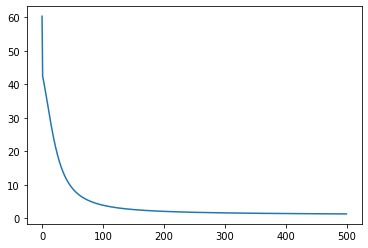

In [ ]:
fin_weights = learn(trainingI, trainingO)  # call function learn

# for i in range(len(trainingI)):  # to verify model output
#   a = forwardPass(fin_weights, trainingI[i])
#   print(">> ", trainingO[i], a)

Q2 (b) Code in the next two sections. This code calls the learn function defined for part (a) on the training data in each iteration of k-fold.


5-Fold estimate of Generalisation Error: 0.012299296977349057


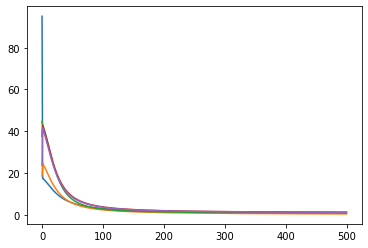

In [ ]:
k = 5  # 5 fold cross validation
block_size = (int) (len(data)/k)  # size of each block
gen_error = 0  # to keep track of avg generalisation error

for i in range (0, (len(data)-block_size+1), block_size):  # loop over data
  
  test = data[i:(i+block_size)]  # test data
  training1 = data[:i]  # take all input rows above test data
  training2 = data[i+block_size:]  # take all input rows below test data
  training = pd.concat([training1, training2], axis=0)  # concatenate to get training data
  
  trainingI = training.loc[:, "bias":"input2":1].to_numpy()  # holds input training data
  trainingO = training.loc[:, "output": :1].to_numpy()  # holds training data output
  testI = test.loc[:, "bias":"input2":1].to_numpy()  # holds input test data
  testO = test.loc[:, "output": :1].to_numpy()  # holds test data output
  
  fin_weights = learn(trainingI, trainingO) # train the network using (k-1) blocks

  mse=0
  
  for i in range(len(testI)):  # for each test input
    a = forwardPass(fin_weights, testI[i])  # get model output
    mse += (testO[i]-a)**2  # find mse between actual and model output

  mse = mse/len(testI)  # avg mse for all test data in this iteration of k-fold
  gen_error += mse  # add to generalisation error

gen_error = gen_error/k  # avg of all generalisation errors
print('\n5-Fold estimate of Generalisation Error:', gen_error[0])


Q2 (c) Generalisation error is the expectation of the model's error when it sees inputs not part of the training data. An error of 0 implies that the machine can accurately predict output for an input it has not seen before. 

In part (b), the Generalisation error we got came quite close to 0 but isn't 0 since the model wasn't able to accurately predict the out for every single input in the test data in each iteration of k-fold. This may be because of the small size of our training data (120 patterns) which was insufficient to get a perfect model. As we increase the size of training data, the model is able to learn better and therefore, this error decreases.  